In [10]:
%matplotlib inline 
import numpy as np 
import pickle

import matplotlib 
from matplotlib import pyplot as plt

In [2]:
from kerasAC.vis import * 
def plot_seq_importance(vals_to_plot, xlim=None, ylim=None, figsize=(25, 3),title="",snp_pos=0,axes=None):
    """Plot  sequence importance score                                                                                                                                                                                                                                                                             
                                                                                                                                                                                                                                                                                                                   
    Args:                                                                                                                                                                                                                                                                                                          
      grads: either deeplift or gradientxinput score matrix                                                                                                                                                                                                                                                        
      x: one-hot encoded DNA sequence                                                                                                                                                                                                                                                                              
      xlim: restrict the plotted xrange                                                                                                                                                                                                                                                                            
      figsize: matplotlib figure size                                                                                                                                                                                                                                                                              
    """
    if axes is None:
        f,axes=plt.subplots(1,dpi=80,figsize=figsize)
        show=True
    else:
        show=False

    seq_len = vals_to_plot.shape[0]
    if xlim is None:
        xlim = (0, seq_len)
    if ylim is None:
        ylim= (np.amin(vals_to_plot),np.amax(vals_to_plot))
    axes=plot_bases_on_ax(vals_to_plot,axes,show_ticks=True)
    plt.xticks(list(range(xlim[0], xlim[1], 5)))
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_title(title)
    axes.axvline(x=snp_pos, color='k', linestyle='--')
    if show==True:
        plt.show()
    else:
        return axes


/users/annashch/kerasAC/kerasAC/vis/plot_letters.py:173: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/users/annashch/kerasAC/kerasAC/vis/plot_letters.py:174: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [3]:
import pickle

In [4]:
shap=pickle.load(open('k562.deepshap.bpnet.p','rb'))

In [5]:
shap.keys()

dict_keys(['coords', 'shap_profile', 'shap_counts'])

In [6]:
coords=shap['coords']
shap_profile=shap['shap_profile']
shap_counts=shap['shap_counts']

In [7]:
coords=[[i.decode('utf8')  for i in j] for j in coords]


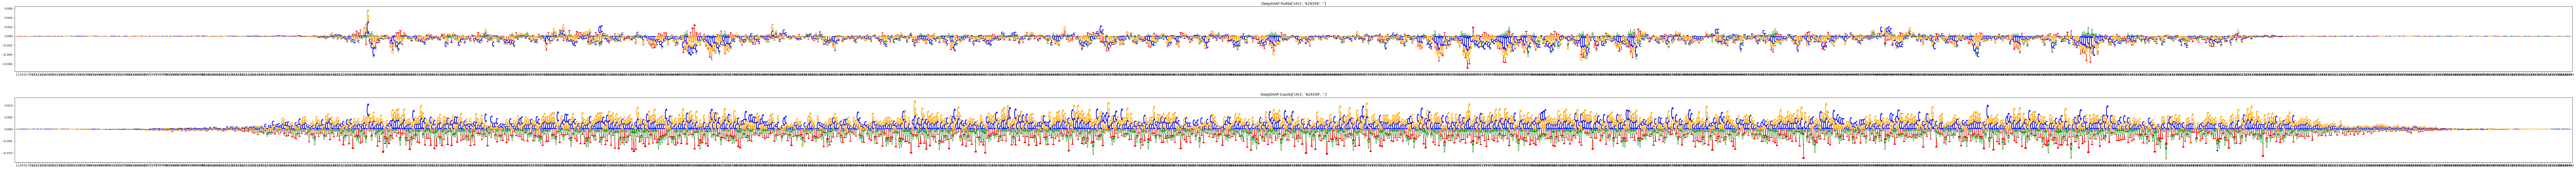

In [11]:
f,axes=plt.subplots(2,dpi=80,figsize=(160,10))
axes[0]=plot_bases_on_ax(shap_profile[0],axes[0],show_ticks=True)
axes[0].set_title('DeepSHAP Profile'+str(coords[0]))
axes[1]=plot_bases_on_ax(shap_counts[0],axes[1],show_ticks=True)
axes[1].set_title('DeepSHAP Counts'+str(coords[0]))
plt.subplots_adjust(hspace=0.4)

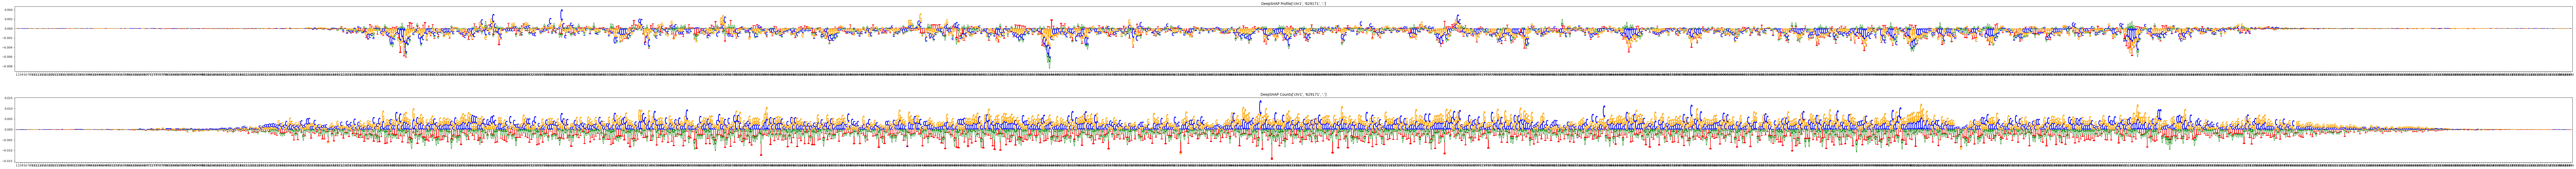

In [12]:
f,axes=plt.subplots(2,dpi=80,figsize=(160,10))
axes[0]=plot_bases_on_ax(shap_profile[1],axes[0],show_ticks=True)
axes[0].set_title('DeepSHAP Profile'+str(coords[1]))
axes[1]=plot_bases_on_ax(shap_counts[1],axes[1],show_ticks=True)
axes[1].set_title('DeepSHAP Counts'+str(coords[1]))
plt.subplots_adjust(hspace=0.4)